# Modelado de Inundaciones con Machine Learning

Este notebook desarrolla un modelo de clasificación para predecir eventos de inundación utilizando datos climáticos procesados en la fase de limpieza.  
Incluye los siguientes pasos:

- Carga del dataset limpio  
- Creación de la variable objetivo para identificar inundaciones  
- Selección de variables relevantes  
- División del dataset en entrenamiento y prueba  
- Entrenamiento de un modelo de Machine Learning  
- Evaluación mediante métricas de desempeño  
- Visualización de importancia de variables  





In [5]:
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Paso 1: Cargamos el dataset limpio
BASE_DIR = Path("..").resolve()     

# Carpeta donde se guardan los datasets limpios
data_path = BASE_DIR / "data_clean" / "master"

# Cargar el dataset "wide" (TEMP, HUMEDAD, LLUVIA, VIENTO)
df = pd.read_parquet(data_path / "master_dataset_final_wide.parquet")


In [6]:
#paso 2 Creamos una variable objetivo

df["flood_label"] = (df["LLUVIA"] > 30).astype(int)
df["flood_label"].value_counts()

flood_label
0    128
1     17
Name: count, dtype: int64

In [7]:
# paso 3 Separamos caracteristicsas y etiquetas
X = df[["TEMP", "HUMEDAD", "LLUVIA", "VIENTO"]] 
y = df["flood_label"]

In [8]:
#paso 4 Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
#Paso 5 el entrenamiendo del modelo
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [10]:
#paso 6 evalucion
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00         4

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

[[25  0]
 [ 0  4]]


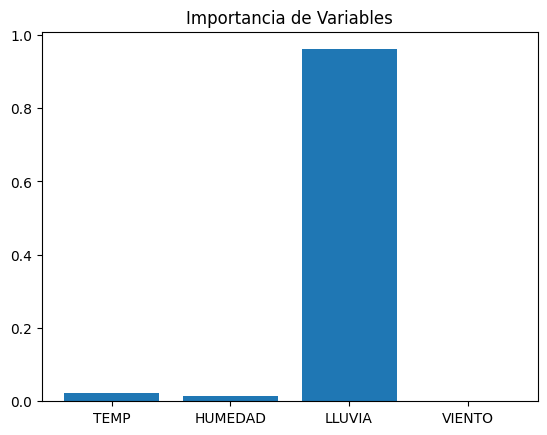

In [11]:
#paso 7, ver las importancias de variables
importances = model.feature_importances_
plt.bar(X.columns, importances)
plt.title("Importancia de Variables")
plt.show()
